# Import Module and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functools
import os

%matplotlib inline

import SISSOkit.evaluation as evl
import SISSOkit.plot as plot
import SISSOkit.utils as utils
pd.options.display.max_columns, pd.options.display.max_rows = None,None

In [2]:
path="/home/xu/Desktop/newIP/T/r2_MT_r=2"
regression=evl.Regression(path)

# Contents of This Report

In the following, there will be the results of:
1. Baseline
1. Descriptors
1. Training errors

In the supplementary information:
1. Whole data set
1. Features
1. Operation set
1. Feature importance
1. Models

# Baseline

This cell contains table and histogram of baseline.

Baseline means the model that uses mean value as the prediction of every sample, i.e., prediction = mean(property).

In this model, RMSE is the standard deviation of property.

In [3]:
regression.baseline

mean         0.797462
std          0.137030
MAE          0.109930
25%ile AE    0.054970
50%ile AE    0.095785
75%ile AE    0.141858
95%ile AE    0.272585
MaxAE        0.442642
dtype: float64

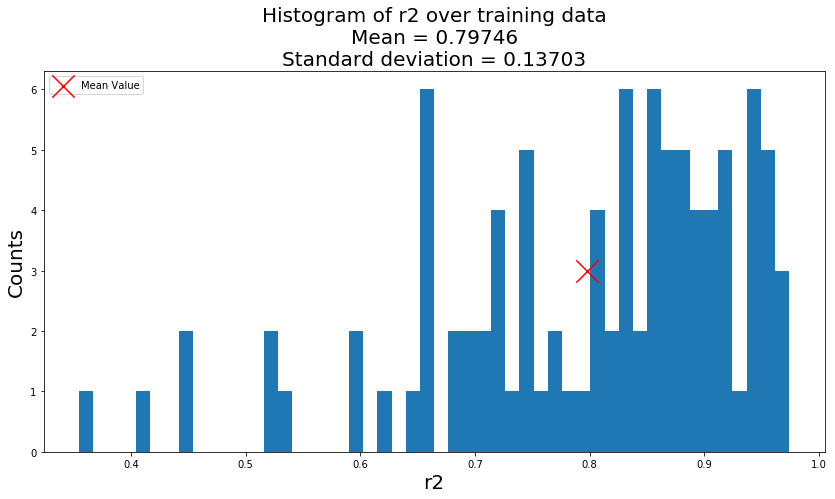

In [4]:
plt.figure(figsize = (14, 7))
plot.baselineplot(regression,bins=50,marker_y=3,marker_shape=500)

# Descriptors

In [5]:
regression.descriptors

[['(((EA_A)^2/(rp_A-rs_A)))'],
 ['(((EA_A)^2/(rp_A-rs_A)))', '((log(rs_A)/(volume*debye_freq)))'],
 ['(((EA_A)^2/(rp_A-rs_A)))',
  '(((rs_A/atomic_homo_A)/(volume*debye_freq)))',
  '(((atomic_lumo_A/rp_A)/(number_A-number_B)))'],
 ['(((EA_A)^2/(rp_A-rs_A)))',
  '(((EA_B*IP_B)*(rp_B/IP_A)))',
  '(((atomic_homo_A/volume)/(number_A-number_B)))',
  '(((mass_A)^2/(rp_B-rs_B)))'],
 ['(((EA_A)^2/(rp_A-rs_A)))',
  '(((EA_B*atomic_homo_B)/(IP_A/rp_B)))',
  '(((atomic_homo_A/volume)/(number_A-number_B)))',
  '(((mass_A)^2/(rp_B-rs_B)))',
  '(((atomic_lumo_B/debye_freq)/(debye_freq/rd_A)))']]

Descriptors:

1. 1D descriptor:

$$
\frac{EA_A^2}{\left( rp_A - rs_A \right)}
$$

$$$$

1. 2D descriptor:

$$
\frac{EA_A^2}{\left( rp_A - rs_A \right)}
$$

$$$$

$$
\frac{\log{\left( rs_A \right)}}{\left( volume * debye_freq \right)}
$$

$$$$

1. 3D descriptor:

$$
\frac{EA_A^2}{\left( rp_A - rs_A \right)}
$$

$$$$

$$
\frac{\frac{rs_A}{atomic_homo_A}}{\left( volume * debye_freq \right)}
$$

$$$$

$$
\frac{\frac{atomic_lumo_A}{rp_A}}{\left( number_A - number_B \right)}
$$

$$$$

1. 4D descriptor:

$$
\frac{EA_A^2}{\left( rp_A - rs_A \right)}
$$

$$$$

$$
\left( \left( EA_B * IP_B \right) * \frac{rp_B}{IP_A} \right)
$$

$$$$

$$
\frac{\frac{atomic_homo_A}{volume}}{\left( number_A - number_B \right)}
$$

$$$$

$$
\frac{mass_A^2}{\left( rp_B - rs_B \right)}
$$

$$$$

1. 5D descriptor:

$$
\frac{EA_A^2}{\left( rp_A - rs_A \right)}
$$

$$$$

$$
\frac{\left( EA_B * atomic_homo_B \right)}{\frac{IP_A}{rp_B}}
$$

$$$$

$$
\frac{\frac{atomic_homo_A}{volume}}{\left( number_A - number_B \right)}
$$

$$$$

$$
\frac{mass_A^2}{\left( rp_B - rs_B \right)}
$$

$$$$

$$
\frac{\frac{atomic_lumo_B}{debye_freq}}{\frac{debye_freq}{rd_A}}
$$

$$$$



# Training Errors

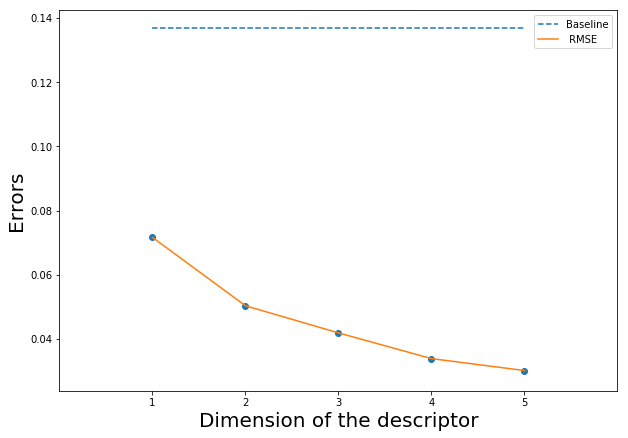

In [6]:
plt.figure(figsize = (10, 7))
plot.abs_errors_vs_dimension(regression,selected_errors=('RMSE',),display_baseline=True)

In [7]:
regression.total_errors(display_baseline=True)

,RMSE,MAE,25%ile AE,50%ile AE,75%ile AE,95%ile AE,MaxAE
Baseline,0.137030,0.109930,0.054970,0.095785,0.141858,0.272585,0.442642
1,0.071659,0.059251,0.028915,0.048938,0.080996,0.133062,0.175778
2,0.050365,0.041175,0.019990,0.034978,0.052772,0.100760,0.135390
3,0.041913,0.032178,0.012007,0.023615,0.044654,0.085320,0.112313
4,0.033902,0.024939,0.008707,0.017791,0.035891,0.072813,0.127158
5,0.030187,0.023091,0.008140,0.017729,0.033810,0.061559,0.108657


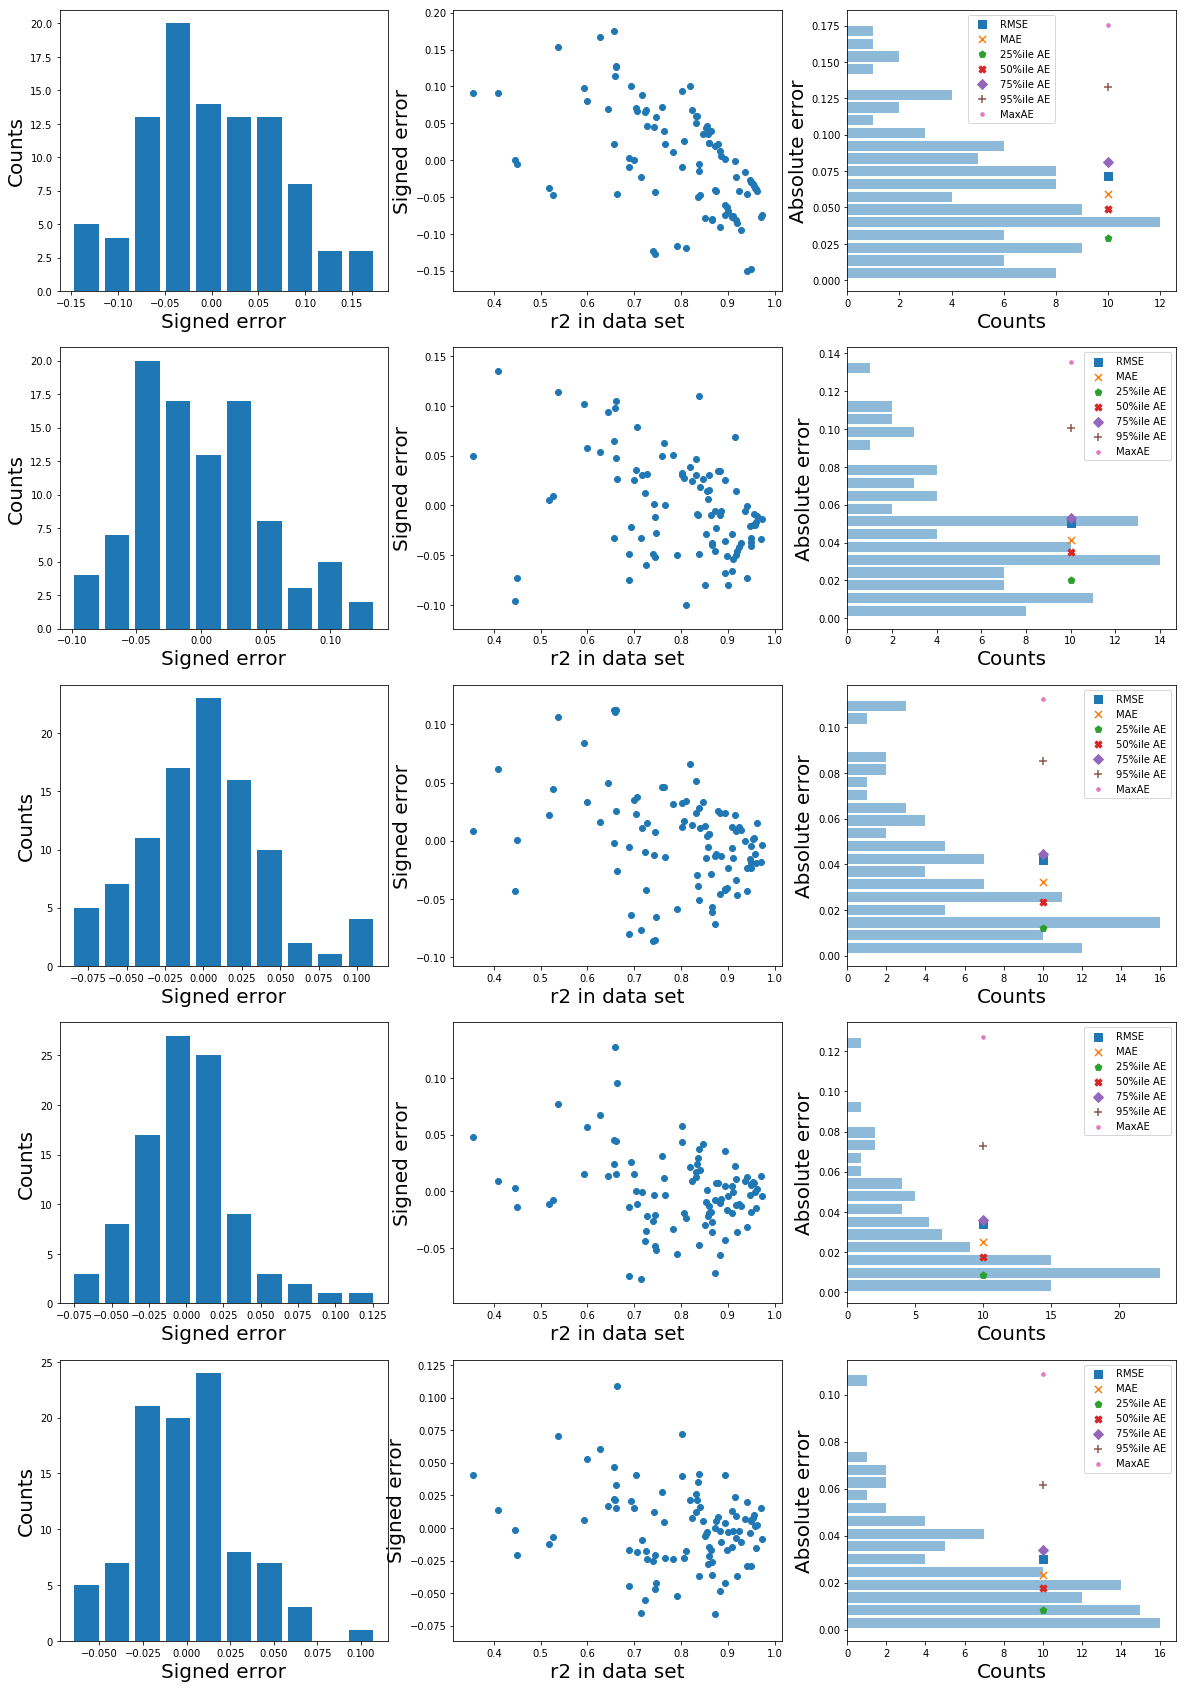

In [8]:
plot.errors_details(regression)

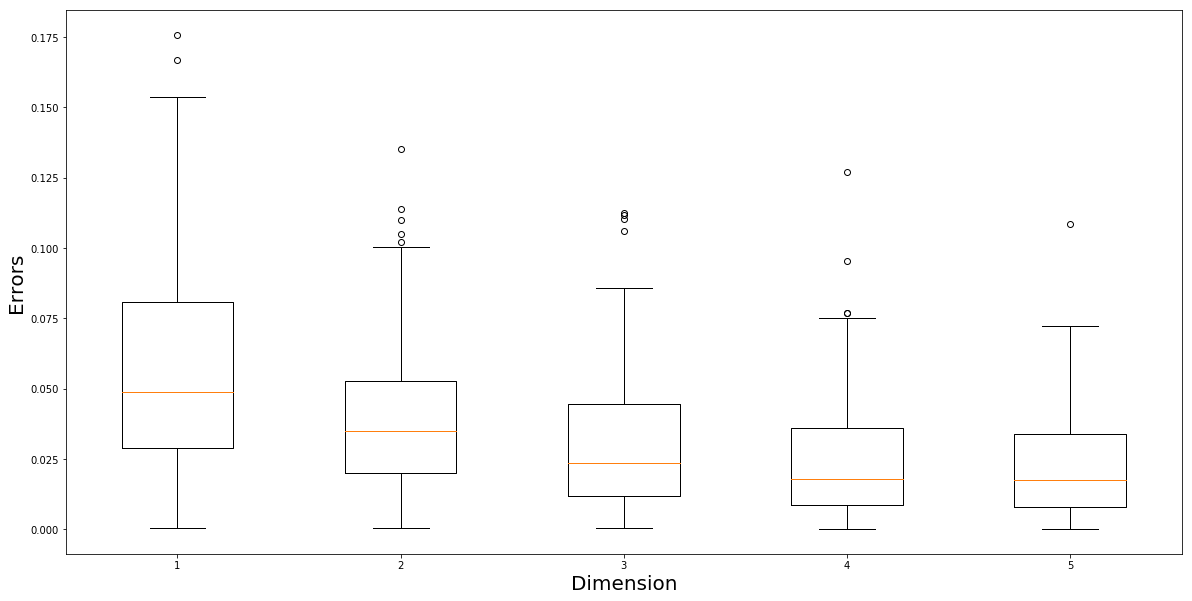

In [9]:
plt.figure(figsize=(20,10))
plot.boxplot(regression)

# Supplementary Information

## Whole Data Set

In [15]:
regression.data.head(2)

,Material,r2,mass_A,mass_B,number_A,number_B,period_A,period_B,atomic_homo_A,atomic_homo_B,atomic_lumo_A,atomic_lumo_B,EA_A,EA_B,IP_A,IP_B,rs_A,rs_B,rp_A,rp_B,rd_A,rd_B,bond_length,volume,Cv_300,Cv_600,debye_freq
0,AgBr,0.688960,107.8682,79.904,47,35,5,4,-4.419473,-7.852589,-4.419473,0.165222,-1.499063,-3.669322,7.746149,12.553645,1.3174,0.7514,1.8871,0.8831,0.5489,0.2281,2.837551,45.694211,49.195543,49.712180,2.527331
1,AgCl,0.657872,107.8682,35.450,47,17,5,3,-4.419473,-8.560230,-4.419473,0.136532,-1.499063,-3.906766,7.746149,13.835604,1.3174,0.6782,1.8871,0.7568,0.5489,2.2374,2.724373,40.441715,48.670028,49.576175,2.321504


## Features

In [11]:
regression.features_name

['mass_A',
 'mass_B',
 'number_A',
 'number_B',
 'period_A',
 'period_B',
 'atomic_homo_A',
 'atomic_homo_B',
 'atomic_lumo_A',
 'atomic_lumo_B',
 'EA_A',
 'EA_B',
 'IP_A',
 'IP_B',
 'rs_A',
 'rs_B',
 'rp_A',
 'rp_B',
 'rd_A',
 'rd_B',
 'bond_length',
 'volume',
 'Cv_300',
 'Cv_600',
 'debye_freq']

## Operation Set

In [12]:
regression.operation_set

['+', '-', '*', '/', 'exp', 'log', '^-1', '^2', '^3', 'sqrt', 'cbrt', '|-|']

## Feature Importance

Feature percent is the percentages of each feature in top `sub_sis` 1D descriptors.

For example, if you set `sub_sis=100` in `SISSO.in`, and SISSO result shows that feature `A` appears in 30 descriptors out of the top 100 (`sub_sis`) features in `./feature_space/Uspace.name`, then the percentage of feature `A` is 30%.

In [13]:
regression.features_percent()

,percent
EA_A,1
IP_A,0.19
rs_A,0.15
rs_B,0.15
atomic_homo_A,0.14
bond_length,0.14
IP_B,0.13
Cv_600,0.12
period_A,0.11
atomic_homo_B,0.1


## Models

Models:
1. 1D model:

	1. Task 1:

$$
0.9241377367\\ - 0.06210553724 \times \frac{EA_A^2}{\left( rp_A - rs_A \right)}
$$
	1. Task 2:

$$
0.839320924\\ - 0.09980667112 \times \frac{EA_A^2}{\left( rp_A - rs_A \right)}
$$
1. 2D model:

	1. Task 1:

$$
0.9963958222\\ - 0.07307065277 \times \frac{EA_A^2}{\left( rp_A - rs_A \right)}\\ - 28.3240558 \times \frac{\log{\left( rs_A \right)}}{\left( volume * debye_freq \right)}
$$
	1. Task 2:

$$
0.9680402164\\ - 0.1193397365 \times \frac{EA_A^2}{\left( rp_A - rs_A \right)}\\ - 50.45597868 \times \frac{\log{\left( rs_A \right)}}{\left( volume * debye_freq \right)}
$$
1. 3D model:

	1. Task 1:

$$
0.9853276545\\ - 0.06634218903 \times \frac{EA_A^2}{\left( rp_A - rs_A \right)}\\ + 24.02732897 \times \frac{\frac{rs_A}{atomic_homo_A}}{\left( volume * debye_freq \right)}\\ - 0.1132063683 \times \frac{\frac{atomic_lumo_A}{rp_A}}{\left( number_A - number_B \right)}
$$
	1. Task 2:

$$
0.9529635461\\ - 0.107946029 \times \frac{EA_A^2}{\left( rp_A - rs_A \right)}\\ + 44.23957825 \times \frac{\frac{rs_A}{atomic_homo_A}}{\left( volume * debye_freq \right)}\\ - 0.1937923491 \times \frac{\frac{atomic_lumo_A}{rp_A}}{\left( number_A - number_B \right)}
$$
1. 4D model:

	1. Task 1:

$$
1.021033258\\ - 0.07216076926 \times \frac{EA_A^2}{\left( rp_A - rs_A \right)}\\ + 0.01553559751 \times \left( \left( EA_B * IP_B \right) * \frac{rp_B}{IP_A} \right)\\ - 0.709294764 \times \frac{\frac{atomic_homo_A}{volume}}{\left( number_A - number_B \right)}\\ + 1.697221505 \times 10^{-7} \times \frac{mass_A^2}{\left( rp_B - rs_B \right)}
$$
	1. Task 2:

$$
1.025216704\\ - 0.1188452202 \times \frac{EA_A^2}{\left( rp_A - rs_A \right)}\\ + 0.02960479251 \times \left( \left( EA_B * IP_B \right) * \frac{rp_B}{IP_A} \right)\\ - 1.16440443 \times \frac{\frac{atomic_homo_A}{volume}}{\left( number_A - number_B \right)}\\ + 2.946591221 \times 10^{-7} \times \frac{mass_A^2}{\left( rp_B - rs_B \right)}
$$
1. 5D model:

	1. Task 1:

$$
1.020207997\\ - 0.07220364646 \times \frac{EA_A^2}{\left( rp_A - rs_A \right)}\\ - 0.0259091673 \times \frac{\left( EA_B * atomic_homo_B \right)}{\frac{IP_A}{rp_B}}\\ - 0.6978779728 \times \frac{\frac{atomic_homo_A}{volume}}{\left( number_A - number_B \right)}\\ + 1.764004806 \times 10^{-7} \times \frac{mass_A^2}{\left( rp_B - rs_B \right)}\\ + 0.05713759499 \times \frac{\frac{atomic_lumo_B}{debye_freq}}{\frac{debye_freq}{rd_A}}
$$
	1. Task 2:

$$
1.027267369\\ - 0.1192756944 \times \frac{EA_A^2}{\left( rp_A - rs_A \right)}\\ - 0.05042077902 \times \frac{\left( EA_B * atomic_homo_B \right)}{\frac{IP_A}{rp_B}}\\ - 1.16329019 \times \frac{\frac{atomic_homo_A}{volume}}{\left( number_A - number_B \right)}\\ + 3.075614878 \times 10^{-7} \times \frac{mass_A^2}{\left( rp_B - rs_B \right)}\\ + 0.1507028272 \times \frac{\frac{atomic_lumo_B}{debye_freq}}{\frac{debye_freq}{rd_A}}
$$
